In [1]:
import sys
sys.path.append('..')
from scripts.data_analysis import DataAnalysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
filepath = '../data/data_wave1.csv'
df = pd.read_csv(filepath)

## Demography and Covariates

In [3]:
demography_and_covariates_cols = ['Sexe', 'Age', 'aedu', 'aauditsc', 'AIPMETO2', 'asmokstat']
demography_data = df[demography_and_covariates_cols]

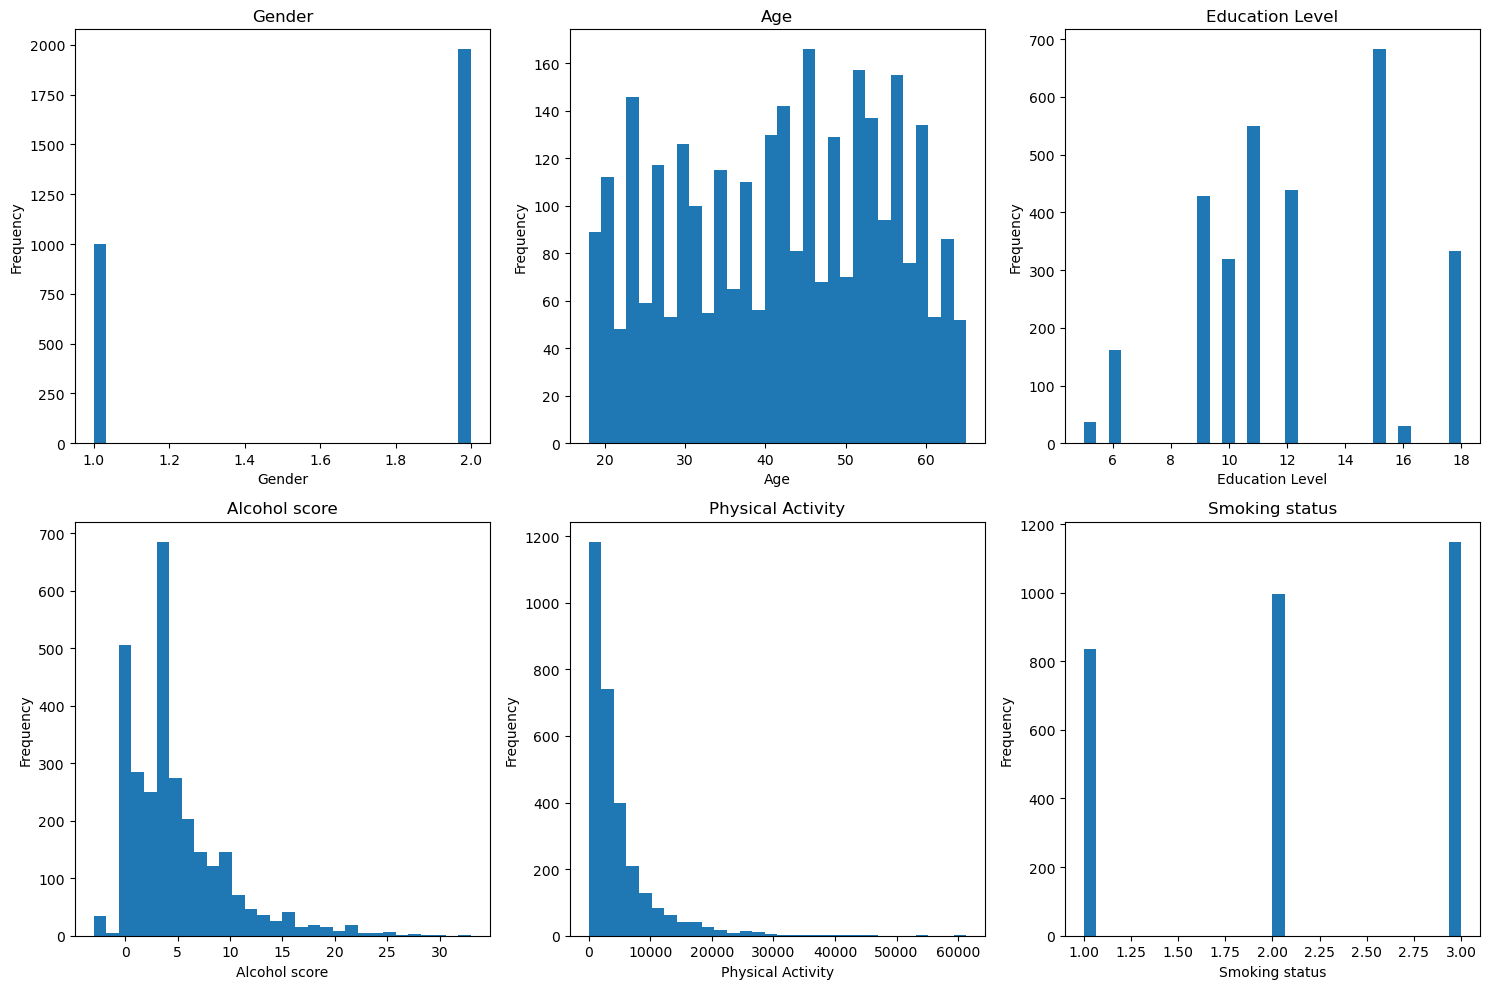

In [6]:
rename_demography_labels = {'Sexe': 'Gender', 'aedu': 'Education Level', 'aauditsc': 'Alcohol score', 'AIPMETO2': 'Physical Activity', 'asmokstat': 'Smoking status'}
DataAnalysis.plot_distribution(demography_data, demography_and_covariates_cols, rename_demography_labels )

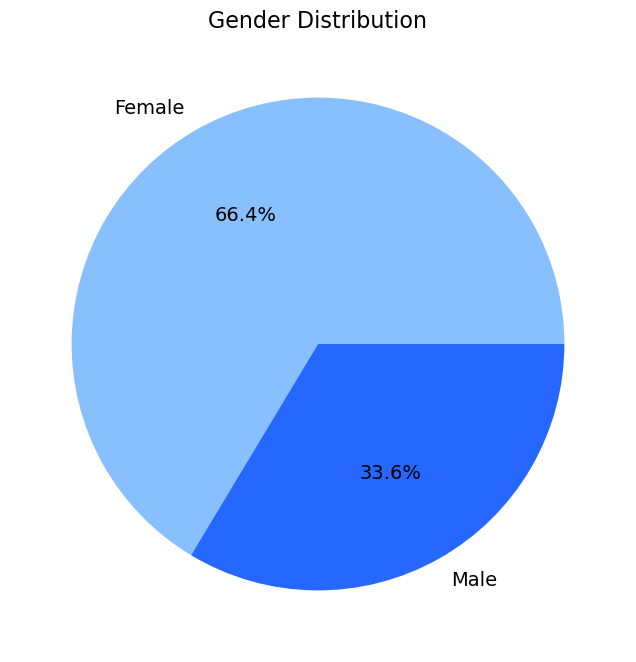

In [52]:
df['Gender'] = df['Sexe'].map({1: 'Male', 2: 'Female'})
gender_counts = df['Gender'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#87bfff', '#2667ff'], textprops={'fontsize': 14})
plt.title('Gender Distribution', fontsize=16)
plt.show()

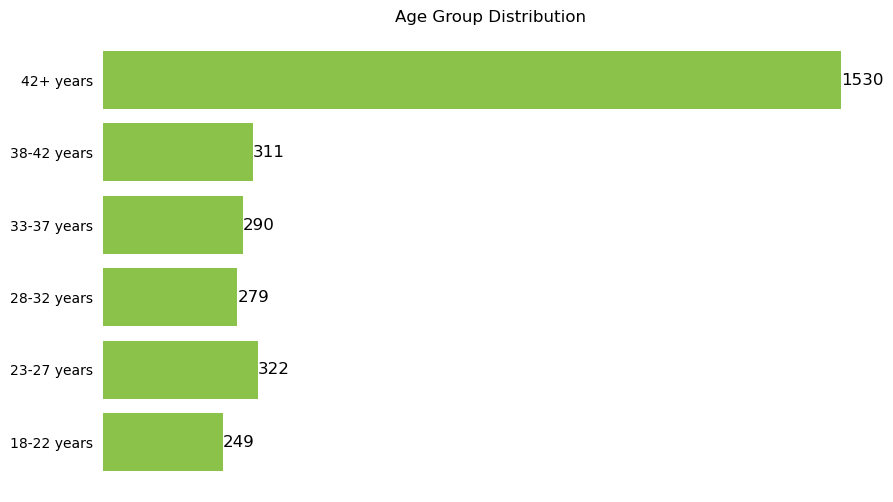

In [47]:
bins = [18, 23, 28, 33, 38, 43, float('inf')]
labels = ['18-22 years', '23-27 years', '28-32 years', '33-37 years', '38-42 years', '42+ years']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_counts = df['Age Group'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
bars = plt.barh(age_group_counts.index, age_group_counts.values, color='#8BC34A')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                f'{bar.get_width()}', va='center', ha='left', fontsize=12)

plt.title('Age Group Distribution')
# Remove the box
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x and y-axis ticks
ax.yaxis.set_ticks_position('none') 
ax.xaxis.set_ticks([])
plt.show()

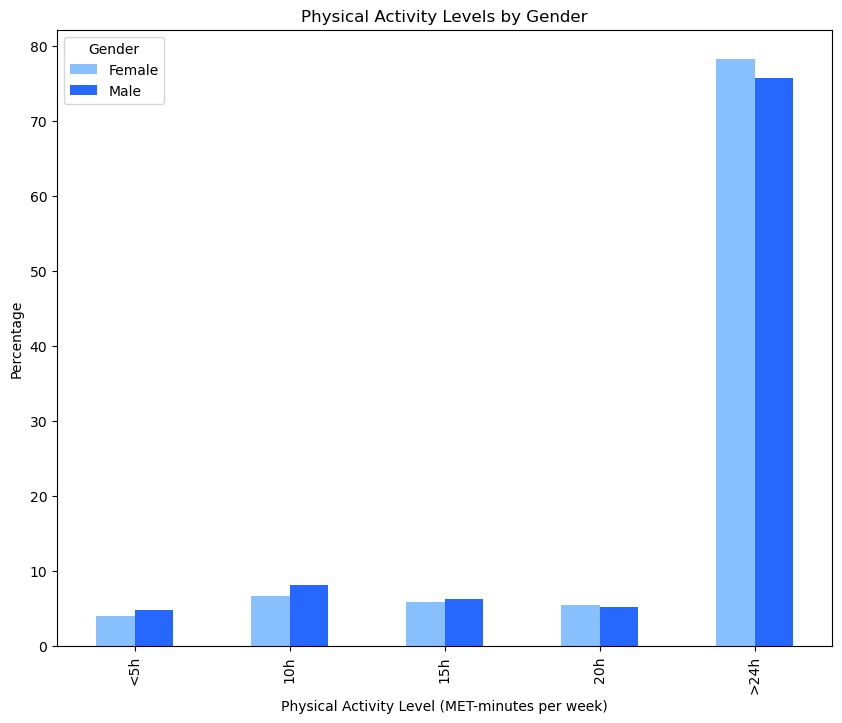

In [50]:
df['Gender'] = df['Sexe'].map({1: 'Male', 2: 'Female'})

bins = [300, 600, 900, 1200, 1440, float('inf')]
labels = ['<5h', '10h', '15h', '20h', '>24h']

df['Activity Level'] = pd.cut(df['AIPMETO2'], bins=bins, labels=labels)
crosstab = pd.crosstab(df['Activity Level'], df['Gender'], normalize='columns') * 100
crosstab.plot(kind='bar', figsize=(10, 8), color=['#87bfff', '#2667ff'])

plt.title('Physical Activity Levels by Gender')
plt.xlabel('Physical Activity Level (MET-minutes per week)')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.show()

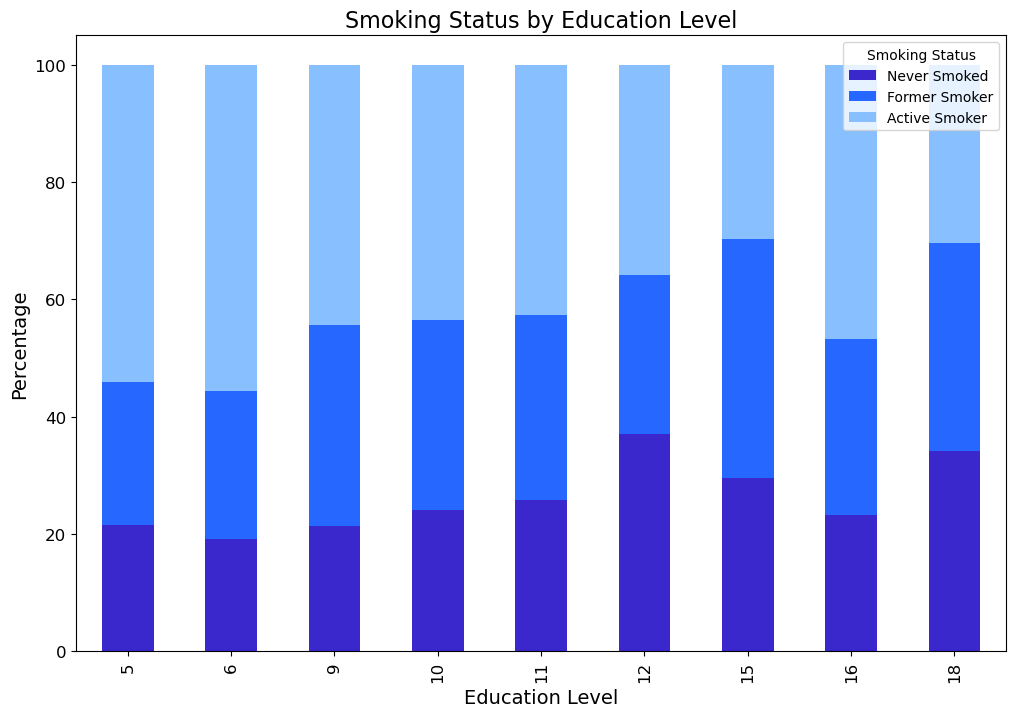

In [35]:
plt.figure(figsize=(12, 8))
    
# Create a crosstab for education level and smoking status
crosstab = pd.crosstab(df['aedu'], df['asmokstat'], normalize='index') * 100
colors = ['#3b28cc', '#2667ff', '#87bfff']
crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors, legend=False)
plt.title('Smoking Status by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Percentage', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(title='Smoking Status', labels=['Never Smoked', 'Former Smoker', 'Active Smoker'])
plt.show()

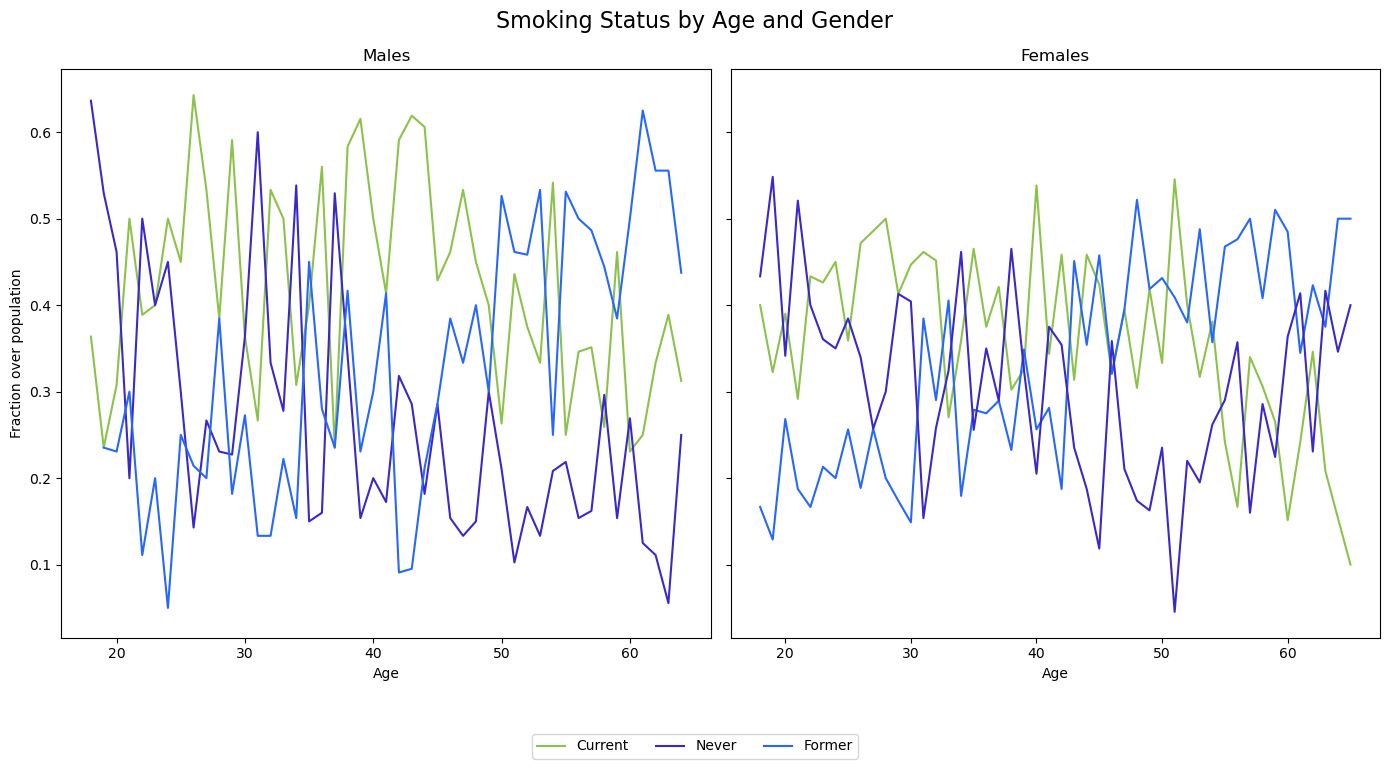

In [60]:
df['Gender'] = df['Sexe'].map({1: 'Male', 2: 'Female'})
df['Smoking Status'] = df['asmokstat'].map({1: 'Never', 2: 'Former', 3: 'Current'})

colors = {'Never': '#3b28cc', 'Former': '#2667ff', 'Current': '#8BC34A'}
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Plot for males
ax_male = axes[0]
df_male = df[df['Gender'] == 'Male']
male_data = df_male.groupby(['Age', 'Smoking Status']).size().groupby(level=0, group_keys=False).apply(lambda x: x / x.sum()).reset_index(name='Fraction')
sns.lineplot(ax=ax_male, x='Age', y='Fraction', hue='Smoking Status', data=male_data, palette=colors)
ax_male.set_title('Males')
ax_male.set_xlabel('Age')
ax_male.set_ylabel('Fraction over population')

# Plot for females
ax_female = axes[1]
df_female = df[df['Gender'] == 'Female']
female_data = df_female.groupby(['Age', 'Smoking Status']).size().groupby(level=0, group_keys=False).apply(lambda x: x / x.sum()).reset_index(name='Fraction')
sns.lineplot(ax=ax_female, x='Age', y='Fraction', hue='Smoking Status', data=female_data, palette=colors)
ax_female.set_title('Females')
ax_female.set_xlabel('Age')


fig.suptitle('Smoking Status by Age and Gender', fontsize=16)

# legend
handles, labels = ax_male.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)
ax_male.get_legend().remove()
ax_female.get_legend().remove()
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

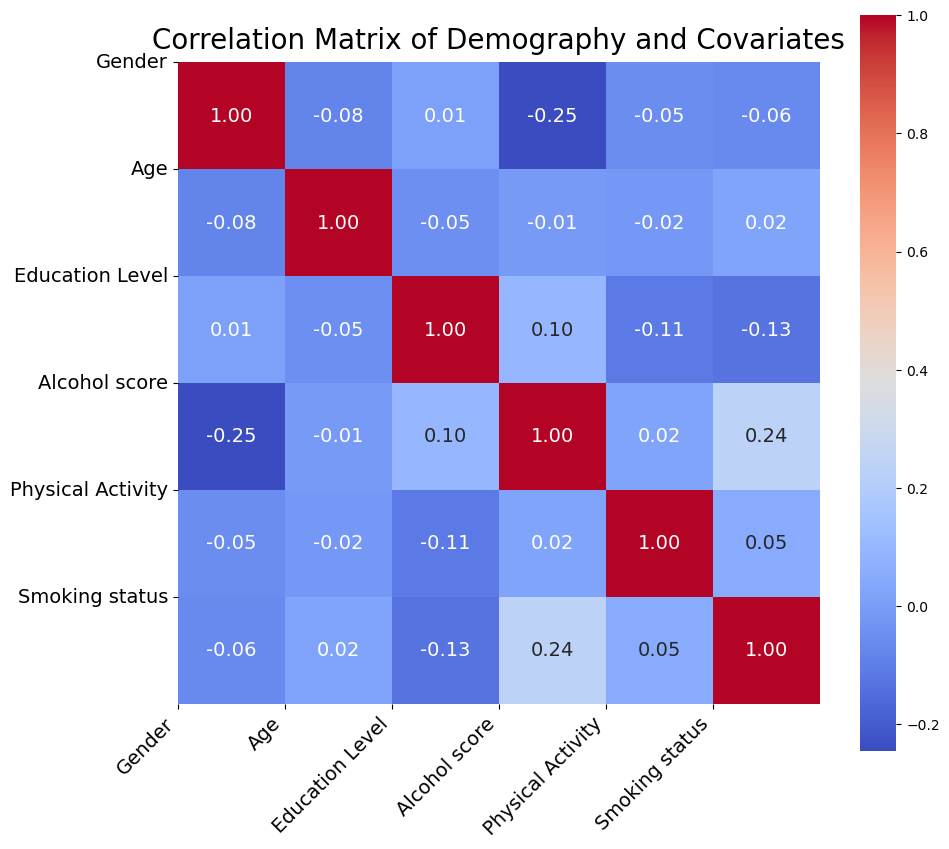

In [7]:
DataAnalysis.plot_correlation_matrix(demography_data, demography_and_covariates_cols, 'Demography and Covariates', rename_demography_labels)

## Target Variables

In [3]:
target_cols = ['amet_syn2', 'acidep09']
target_df = df[target_cols]

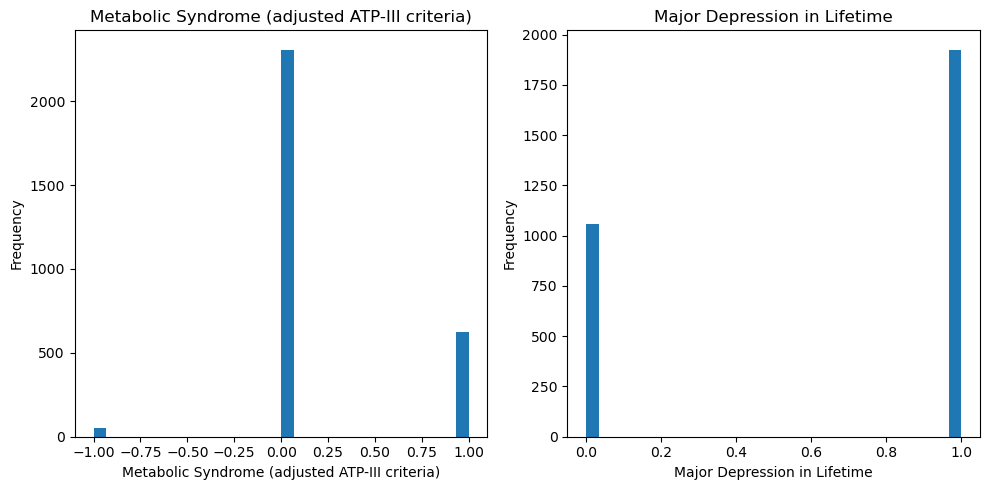

In [4]:
rename_target_labels = {'amet_syn2': 'Metabolic Syndrome (adjusted ATP-III criteria)', 'acidep09': 'Major Depression in Lifetime'}
DataAnalysis.plot_distribution(target_df, target_cols, rename_target_labels)